In [1]:
import sys
sys.path.append("../")
print(sys.path)


['/Users/afreenshaikh/multi_modal/sherlock/data_analysis', '/Users/afreenshaikh/miniconda3/envs/anlp_assignment2/lib/python311.zip', '/Users/afreenshaikh/miniconda3/envs/anlp_assignment2/lib/python3.11', '/Users/afreenshaikh/miniconda3/envs/anlp_assignment2/lib/python3.11/lib-dynload', '', '/Users/afreenshaikh/miniconda3/envs/anlp_assignment2/lib/python3.11/site-packages', '../']


In [2]:
import json
from file_utils import VAL_FILE_PATH, TRAIN_FILE_PATH
from pprint import pprint

val_data = json.load(open(VAL_FILE_PATH))
train_data = json.load(open(TRAIN_FILE_PATH))


In [15]:
get_image_url = lambda x:x["inputs"]["image"]["url"]
get_image_dim = lambda x:{"width": x["inputs"]["image"]["width"], "height": x["inputs"]["image"]["height"]}
get_bboxes = lambda x:x["inputs"]["bboxes"]
get_clue = lambda x:x["inputs"]["clue"]
get_inference = lambda x:x["targets"]["inference"]
get_instance_id = lambda x:x["instance_id"]


In [27]:
from numpy import average
import requests
from PIL import Image, ImageDraw
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# Function to display an image with bounding boxes
def display_image_with_bboxes(image_url, bboxes):
    # Download the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    
    # Draw the bounding boxes on the image
    draw = ImageDraw.Draw(img)
    for bbox in bboxes:
        # Calculate the bounding box coordinates
        left, top = bbox['left'], bbox['top']
        right, bottom = left + bbox['width'], top + bbox['height']
        label = bbox.get('label', '')  # Get the label if it exists
        
        # Draw the rectangle
        draw.rectangle(((left, top), (right, bottom)), outline="red", width=3)
        
        # Draw the label if it exists
        if label:
            draw.text((left, top), label, fill="red")
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # Hide the axes
    plt.show()

def plot_histogram(array):

    # Example array
    arr = np.array(array)
    print("Average bboxes : ", average(array))
    unique_elements, counts = np.unique(arr, return_counts=True)

    # Plotting
    plt.bar(unique_elements, counts)
    plt.xlabel('bboxes per clue')
    plt.ylabel('datapoints')
    plt.title('Histogram of bboxes per clue')
    plt.xticks(unique_elements)  # Ensure all unique elements are shown as ticks

    # Annotating each bar with its count
    for i in range(len(unique_elements)):
        plt.text(unique_elements[i], counts[i] + 0.1, str(counts[i]), ha='center')

    plt.show()

def plot_histogram_with_binning(array, num_bins = 10):
    # Creating the histogram, but this time just to get the bin edges
    arr = np.array(array)
    counts, bin_edges = np.histogram(arr, bins=num_bins)

    # Plotting the histogram and capturing the bin counts and patches
    counts, bins, patches = plt.hist(arr, bins=num_bins, edgecolor='black')

    # Annotate each bar with its frequency
    for count, patch in zip(counts, patches):
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)),
                ha='center', va='bottom')

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram with Frequencies')
    plt.show()


def bbox_to_image_ratio(image_dim, bbox):
    # Calculate the area of the image
    image_area = image_dim['width'] * image_dim['height']
    # Calculate the area of the bounding box
    bbox_area = bbox['width'] * bbox['height']
    # Calculate the ratio
    ratio = bbox_area / image_area
    return ratio


{'inputs': {'bboxes': [{'height': 113, 'left': 47, 'top': 211, 'width': 70},
                       {'height': 112, 'left': 187, 'top': 208, 'width': 55},
                       {'height': 126, 'left': 260, 'top': 213, 'width': 36},
                       {'height': 51, 'left': 235, 'top': 179, 'width': 61},
                       {'height': 97, 'left': 261, 'top': 99, 'width': 35},
                       {'height': 66, 'left': 187, 'top': 137, 'width': 71},
                       {'height': 50, 'left': 76, 'top': 180, 'width': 34},
                       {'height': 48, 'left': 15, 'top': 165, 'width': 52},
                       {'height': 31, 'left': 46, 'top': 143, 'width': 24},
                       {'height': 50, 'left': 91, 'top': 142, 'width': 47},
                       {'height': 38, 'left': 194, 'top': 110, 'width': 40},
                       {'height': 42, 'left': 203, 'top': 68, 'width': 28},
                       {'height': 46, 'left': 247, 'top': 48, 'width': 44},
    

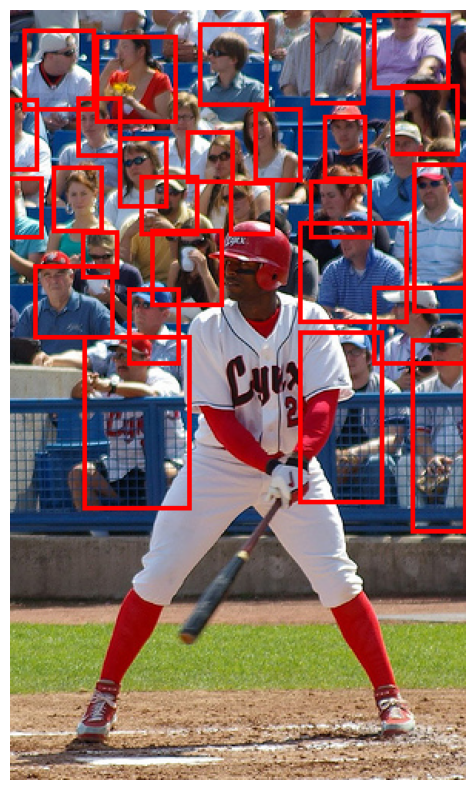

In [8]:
dp = train_data[30963]
pprint(dp)
display_image_with_bboxes(get_image_url(dp), get_bboxes(dp))


TRAIN:
total datapoints:  317054
unique images 90164
total_clues 317054
datapoint greater than 8 bboxes [(4128, 11), (14819, 9), (19059, 9), (30963, 27), (34086, 11), (36116, 9), (43427, 9), (44525, 12), (44526, 13), (47637, 11), (48166, 9), (51065, 12), (71967, 9), (77845, 10), (81272, 9), (83153, 16), (84752, 9), (90872, 10), (97124, 10), (103404, 9), (109940, 9), (124584, 9), (126279, 13), (143643, 9), (144186, 10), (144187, 9), (153208, 9), (156052, 16), (172311, 10), (176449, 9), (178064, 9), (181881, 10), (198527, 9), (204157, 9), (204158, 9), (207619, 14), (212096, 11), (229390, 10), (233812, 11), (241594, 11), (243863, 9), (244966, 11), (250516, 16), (256138, 9), (256868, 11), (269326, 10), (273639, 13), (298188, 9), (299266, 9), (302254, 14), (303168, 9), (316380, 10)]
Average bboxes :  1.1702643713689151


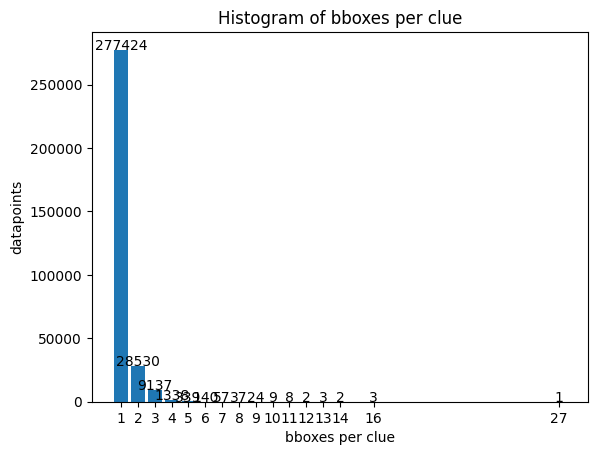

VAL:
total datapoints:  22737
unique images 6656
total_clues 22737
datapoint greater than 8 bboxes [(10458, 9), (10725, 10), (13342, 9), (14563, 11), (17045, 11)]
Average bboxes :  1.1780358006773102


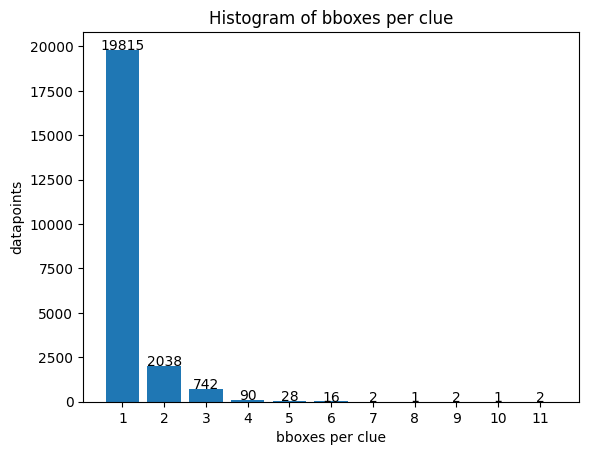

In [11]:
data = train_data
print("TRAIN:")
print("total datapoints: ", len(data))
unique_urls = len(set([get_image_url(x) for x in data]))
total_clues = len(data)

print("unique images", unique_urls)
print("total_clues", total_clues)

bbox_count = []
for i, dp in enumerate(data):
    bbox_count.append((i,len(get_bboxes(dp))))
threshold = 8
print(f"datapoint greater than {threshold} bboxes",[(i,c) for (i,c) in bbox_count if c>8])

plot_histogram([x[1] for x in bbox_count])


data = val_data
print("VAL:")
print("total datapoints: ", len(data))
unique_urls = len(set([get_image_url(x) for x in data]))
total_clues = len(data)

print("unique images", unique_urls)
print("total_clues", total_clues)

bbox_count = []
for i, dp in enumerate(data):
    bbox_count.append((i,len(get_bboxes(dp))))
threshold = 8
print(f"datapoint greater than {threshold} bboxes",[(i,c) for (i,c) in bbox_count if c>8])

plot_histogram([x[1] for x in bbox_count])



[0.5915556066176471, 0.39701286764705884, 0.03861060049019608, 0.04308108660130719, 0.14960554534313725, 0.0900735294117647, 0.0894735498366013, 0.03636003880718954, 0.036397058823529414, 0.024509803921568627] 371037


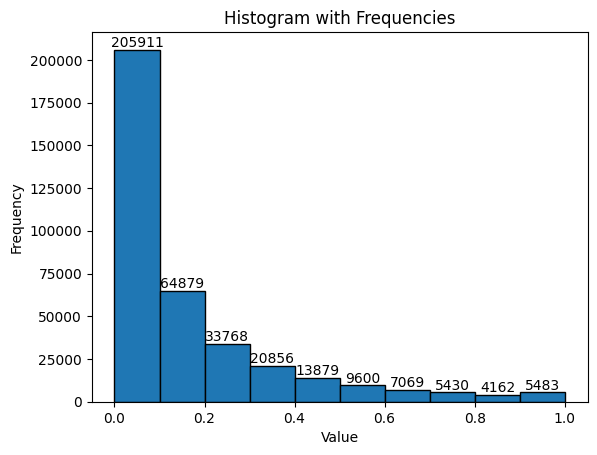

[0.079744, 0.04523775077160494, 0.03935135135135135, 0.3046115451388889, 1.0850694444444444e-06, 0.1258562874251497, 0.16115771812080537, 0.12107938472418671, 0.13588666902404525, 0.038994087567913074] 26785


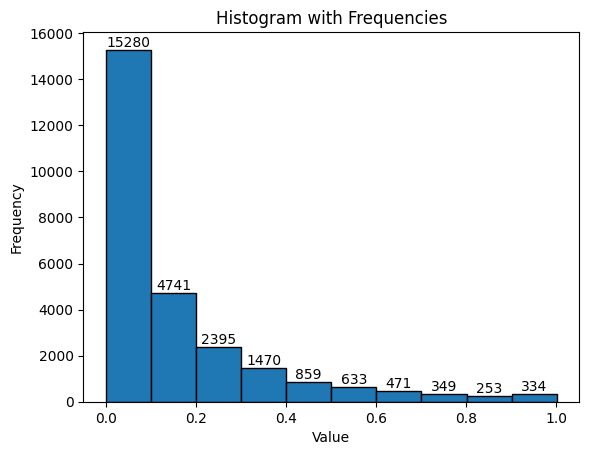

In [28]:
data = train_data
bbox_to_img_ratios = []
for dp in data:
    image_dim = get_image_dim(dp)
    bboxes = get_bboxes(dp)
    bbox_to_img_ratios.extend([bbox_to_image_ratio(image_dim, bbox) for bbox in bboxes])

print(bbox_to_img_ratios[:10], len(bbox_to_img_ratios))
plot_histogram_with_binning(bbox_to_img_ratios)


data = val_data
bbox_to_img_ratios = []
for dp in data:
    image_dim = get_image_dim(dp)
    bboxes = get_bboxes(dp)
    bbox_to_img_ratios.extend([bbox_to_image_ratio(image_dim, bbox) for bbox in bboxes])
print(bbox_to_img_ratios[:10], len(bbox_to_img_ratios))
plot_histogram_with_binning(bbox_to_img_ratios)
